<a href="https://colab.research.google.com/github/Priyesh29sri/PytorchLearning/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

what is Tensor?
A torch.Tensor is a multidimentional matirx containing elements of single data type.
Similar to numpy arrays, but full of fun things that make then work better on GPU's(default data type is float 32)
More suitable for deep Learning that numpy arrays.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__ (self, input_features = 4, h1 = 8, h2= 9, output_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,output_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [6]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [7]:
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

<ipython-input-7-b0c75c2d87da>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# train, test and Split set x and y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']


In [9]:
X = X.values
y = y.values


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=41)

In [12]:
X_train = torch.FloatTensor(X_train) #convert X features to Float tensors
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train) #convert y features to Long tensors
y_test = torch.LongTensor(y_test)

In [14]:
#set a criteria of model to measure that error , how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#choose adam optimizer, lr = learning rate (if the error does'nt go down after bunch of interations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [15]:
# Train our model
# Epochs? (one run through all the training data in the network)
epochs = 100
losses = []
for i in range (epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # Get prdicted results


  # Measure the loss/errors, gonna be high at first
  loss = criterion(y_pred, y_train) # Predicted values vs y_train values

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # to do some back propogation : take the error rate from forward propogation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'epoch')

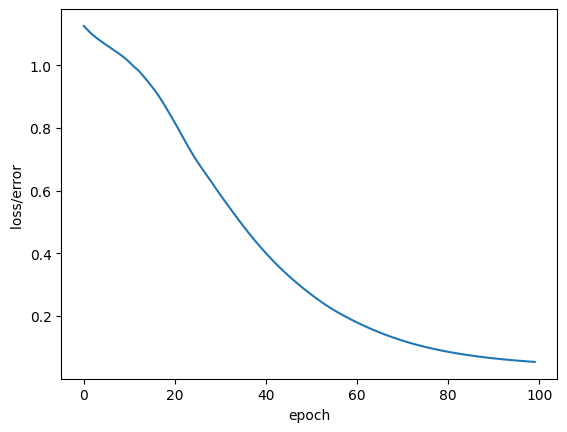

In [16]:
# graph it out!
plt.plot(range(epochs),losses)
plt.ylabel("loss/error ")
plt.xlabel("epoch")

In [17]:
# Evaluate the model on test data set (validate model on test set)
with torch.no_grad():  # basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be prediction
  loss = criterion(y_eval, y_test) # find the loss


In [18]:
loss

tensor(0.1315)

In [19]:
correct = 0
with torch.no_grad():
   for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i]==0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor "
    else:
      x = "Virginica"

# this will tell us which type of iris or flower class our network think it is
    print(f'{i+1}.) {str(y_eval)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct!')

1.) tensor([[-5.8771,  4.4629,  6.5155],
        [-7.5451,  4.1668,  9.7293],
        [-8.4517,  5.1275, 10.2015],
        [-4.3411,  5.6280,  2.5636],
        [-7.1838,  4.8757,  8.3024],
        [-3.3940,  5.3421,  1.2802],
        [-5.9240,  4.9826,  6.0025],
        [-4.2895,  5.7016,  2.3920],
        [-6.5369,  4.9261,  7.1291],
        [-8.0526,  4.4129, 10.3325],
        [-5.6775,  4.9505,  5.6248],
        [ 4.5748, -2.2579, -2.8925],
        [ 4.2646, -2.0055, -2.7342],
        [-2.1081,  4.0482,  0.5803],
        [ 3.4608, -1.2147, -2.3488],
        [-5.4739,  5.1174,  5.0966],
        [ 4.0637, -1.8045, -2.6504],
        [-5.8090,  4.6057,  6.2494],
        [ 4.9250, -2.5763, -3.0545],
        [ 3.4559, -1.2559, -2.3637],
        [-2.6161,  4.5584,  0.8575],
        [-7.7427,  4.7379,  9.4233],
        [ 3.5776, -1.3269, -2.4109],
        [ 4.5445, -2.2478, -2.8698],
        [-2.6548,  4.6138,  0.8825],
        [-3.2832,  5.2189,  1.2163],
        [-4.6527,  5.7790,  2.9302

In [20]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [21]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [22]:
newer_iris = torch.tensor([5.9,	3.0,	5.1,	1.8])

In [23]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [24]:
# Save our nn model
torch.save(model.state_dict(), 'my_really_awesome_isris_model.pt')

In [25]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_isris_model.pt'))

<ipython-input-25-5605cb8ebb86>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_isris_model.pt'))


<All keys matched successfully>

In [26]:
# make it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)